# Greenhouse Gas Emissions Footprint Analysis Across Supply Chain Sectors in America

This notebook analyzes domain specific emissions across various supply chain sectors using data from `insights.db`.

# naics_ghg_2017-Insights

In [6]:
# Importing Necessary Libraries
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Setting Visualization Style
sns.set(style='whitegrid')

# Establishing a Connection to the SQLite Database
db_path = 'insights.db'
conn = sqlite3.connect(db_path)

# Loading data from the 'naics_ghg_2017' table
query = "SELECT * FROM naics_ghg_2017"
df = pd.read_sql(query, conn)

# Inspecting the first few rows of the dataset
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0


In [11]:
# Analyzing the data to extract meaningful insights
# Grouping by NAICS Title to calculate mean and total emissions
emission_summary = df.groupby('2017 NAICS Title').agg({
    'Supply Chain Emission Factors without Margins': ['mean', 'sum'],
    'Margins of Supply Chain Emission Factors': ['mean', 'sum'],
    'Supply Chain Emission Factors with Margins': ['mean', 'sum']
}).reset_index()

# Renaming columns for clarity
emission_summary.columns = ['NAICS Title', 'Mean Emission Factors without Margins', 'Total Emission Factors without Margins', 'Mean Margins of Emission Factors', 'Total Margins of Emission Factors', 'Mean Emission Factors with Margins', 'Total Emission Factors with Margins']

# Displaying the summary of emissions
print(emission_summary.head())

# Finding the top 5 sectors with the highest total emissions
top_emission_sectors = emission_summary.sort_values(by='Total Emission Factors without Margins', ascending=False).head(5)
print(top_emission_sectors)

                                         NAICS Title  \
0                     Abrasive Product Manufacturing   
1                             Adhesive Manufacturing   
2  Administrative Management and General Manageme...   
3                               Advertising Agencies   
4         Advertising Material Distribution Services   

   Mean Emission Factors without Margins  \
0                               0.006759   
1                               0.024686   
2                               0.003694   
3                               0.004075   
4                               0.004075   

   Total Emission Factors without Margins  Mean Margins of Emission Factors  \
0                                0.121669                          0.002586   
1                                0.444357                          0.001385   
2                                0.066490                          0.000000   
3                                0.073354                          0.000000   
4  

In [12]:
# Analyzing trends and patterns in emissions across sectors
# Calculating the overall mean emissions across all sectors
overall_mean_emissions = df['Supply Chain Emission Factors without Margins'].mean()

# Finding sectors with emissions above the overall mean
above_mean_sectors = emission_summary[emission_summary['Mean Emission Factors without Margins'] > overall_mean_emissions]

# Finding the total number of sectors above the mean
total_above_mean_sectors = above_mean_sectors.shape[0]

# Displaying the overall mean and sectors above the mean
print('Overall Mean Emissions:', overall_mean_emissions)
print('Total Sectors Above Mean Emissions:', total_above_mean_sectors)
print(above_mean_sectors.head())

Overall Mean Emissions: 0.010224387893212018
Total Sectors Above Mean Emissions: 301
                                          NAICS Title  \
1                              Adhesive Manufacturing   
14     All Other Basic Organic Chemical Manufacturing   
17    All Other Converted Paper Product Manufacturing   
26                         All Other Metal Ore Mining   
28  All Other Miscellaneous Chemical Product and P...   

    Mean Emission Factors without Margins  \
1                                0.024686   
14                               0.052944   
17                               0.015355   
26                               0.027968   
28                               0.023436   

    Total Emission Factors without Margins  Mean Margins of Emission Factors  \
1                                 0.444357                          0.001385   
14                                0.952988                          0.000888   
17                                0.276394                   

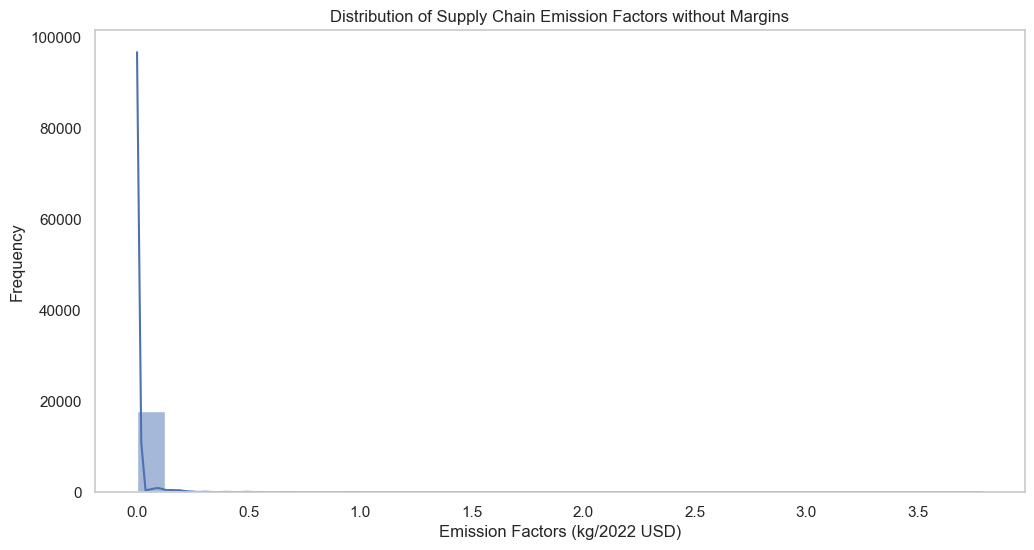

Number of Outliers: 4200


In [9]:
# Analyzing the distribution of emissions and identifying outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of emissions without margins
plt.figure(figsize=(12, 6))
sns.histplot(df['Supply Chain Emission Factors without Margins'], bins=30, kde=True)
plt.title('Distribution of Supply Chain Emission Factors without Margins')
plt.xlabel('Emission Factors (kg/2022 USD)')
plt.ylabel('Frequency')
plt.grid()
plt.savefig('emission_distribution.png')
plt.show()

# Identifying outliers using the IQR method
Q1 = df['Supply Chain Emission Factors without Margins'].quantile(0.25)
Q3 = df['Supply Chain Emission Factors without Margins'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Supply Chain Emission Factors without Margins'] < lower_bound) | (df['Supply Chain Emission Factors without Margins'] > upper_bound)]

# Displaying the number of outliers
num_outliers = outliers.shape[0]
print('Number of Outliers:', num_outliers)

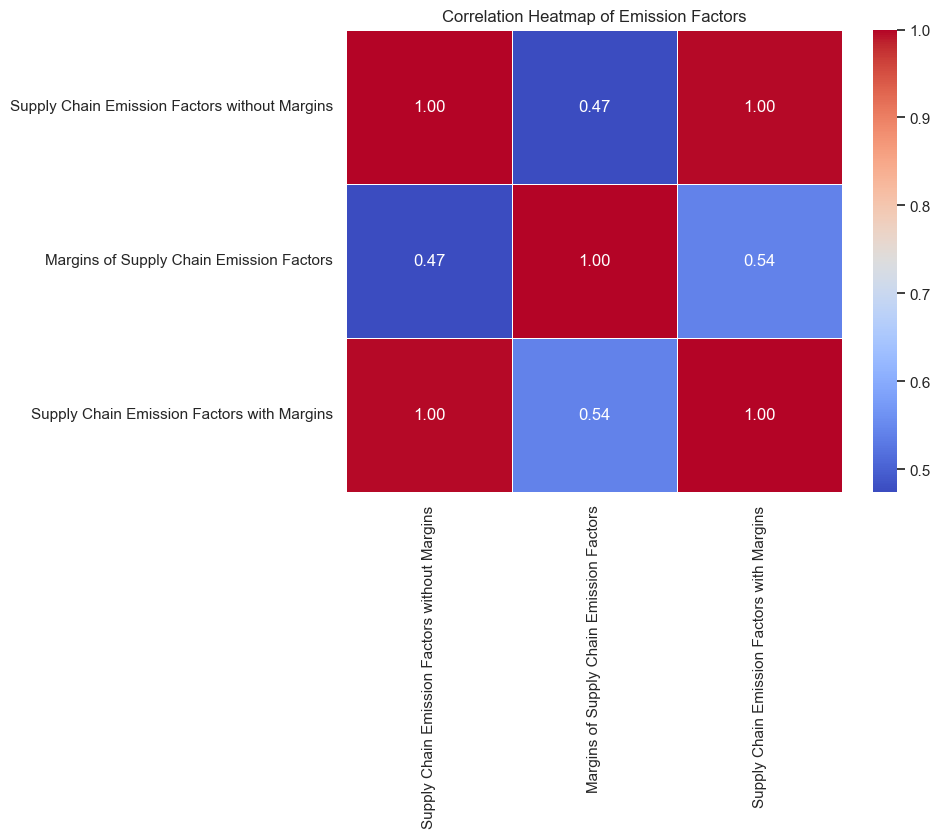

In [10]:
# Analyzing the relationship between different emission factors
# Calculating the correlation matrix for the relevant emission factors
correlation_matrix = df[['Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Emission Factors')
plt.savefig('correlation_heatmap.png')
plt.show()

# naics_co2_2017-Insights

In [13]:
# Loading data from the 'naics_ghg_2017' table
query = "SELECT * FROM naics_co2_2017"
df = pd.read_sql(query, conn)

# Inspecting the first few rows of the dataset
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [14]:
# Analyzing the data to extract meaningful insights

# 1. Grouping by NAICS Title to find average emissions factors
average_emissions = df.groupby('2017 NAICS Title')[['Supply Chain Emission Factors without Margins', 'Supply Chain Emission Factors with Margins']].mean().reset_index()

# 2. Finding the sector with the highest emissions
highest_emission_sector = average_emissions.loc[average_emissions['Supply Chain Emission Factors without Margins'].idxmax()]

# 3. Finding the sector with the lowest emissions
lowest_emission_sector = average_emissions.loc[average_emissions['Supply Chain Emission Factors without Margins'].idxmin()]

# 4. Analyzing the standard deviation of emissions factors to understand variability
emission_variability = average_emissions[['Supply Chain Emission Factors without Margins', 'Supply Chain Emission Factors with Margins']].std()

# 5. Counting the number of sectors with emissions factors above a certain threshold (e.g., 0.5 kg CO2e/2022 USD)
threshold_count = (average_emissions['Supply Chain Emission Factors without Margins'] > 0.5).sum()

# Compiling the insights
insights = {
    'average_emissions': average_emissions,
    'highest_emission_sector': highest_emission_sector,
    'lowest_emission_sector': lowest_emission_sector,
    'emission_variability': emission_variability,
    'threshold_count': threshold_count
}

# Displaying the insights
insights

{'average_emissions':                                        2017 NAICS Title  \
 0                        Abrasive Product Manufacturing   
 1                                Adhesive Manufacturing   
 2     Administrative Management and General Manageme...   
 3                                  Advertising Agencies   
 4            Advertising Material Distribution Services   
 ...                                                 ...   
 1011  Wood Kitchen Cabinet and Countertop Manufacturing   
 1012                Wood Office Furniture Manufacturing   
 1013                                  Wood Preservation   
 1014                 Wood Window and Door Manufacturing   
 1015                         Zoos and Botanical Gardens   
 
       Supply Chain Emission Factors without Margins  \
 0                                             0.134   
 1                                             0.502   
 2                                             0.078   
 3                               

In [15]:
# Displaying the average emissions data
average_emissions_display = average_emissions.sort_values(by='Supply Chain Emission Factors without Margins', ascending=False)

# Displaying the highest and lowest emission sectors
highest_emission_sector_display = highest_emission_sector[['2017 NAICS Title', 'Supply Chain Emission Factors without Margins']]
lowest_emission_sector_display = lowest_emission_sector[['2017 NAICS Title', 'Supply Chain Emission Factors without Margins']]

# Compiling the results for display
results = {
    'average_emissions': average_emissions_display,
    'highest_emission_sector': highest_emission_sector_display,
    'lowest_emission_sector': lowest_emission_sector_display,
    'emission_variability': emission_variability,
    'threshold_count': threshold_count
}

results

{'average_emissions':                              2017 NAICS Title  \
 143                      Cement Manufacturing   
 99           Beef Cattle Ranching and Farming   
 267  Dual-Purpose Cattle Ranching and Farming   
 142                           Cattle Feedlots   
 234          Dairy Cattle and Milk Production   
 ..                                        ...   
 23     All Other Insurance Related Activities   
 545                          Music Publishers   
 893                   Sound Recording Studios   
 803        Record Production and Distribution   
 691          Other Sound Recording Industries   
 
      Supply Chain Emission Factors without Margins  \
 143                                          3.846   
 99                                           2.847   
 267                                          2.847   
 142                                          2.847   
 234                                          1.682   
 ..                                            

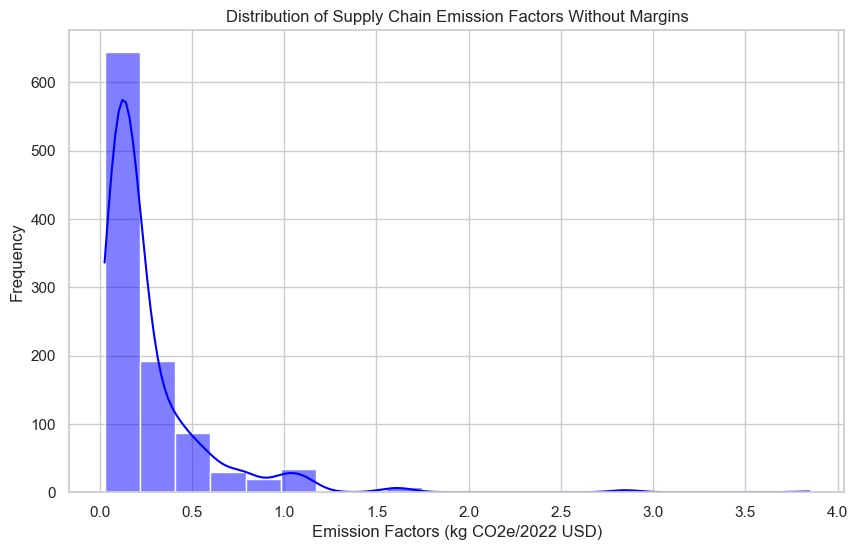

In [17]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Supply Chain Emission Factors without Margins'], kde=True, bins=20, color='blue')
plt.title('Distribution of Supply Chain Emission Factors Without Margins')
plt.xlabel('Emission Factors (kg CO2e/2022 USD)')
plt.ylabel('Frequency')
plt.show()

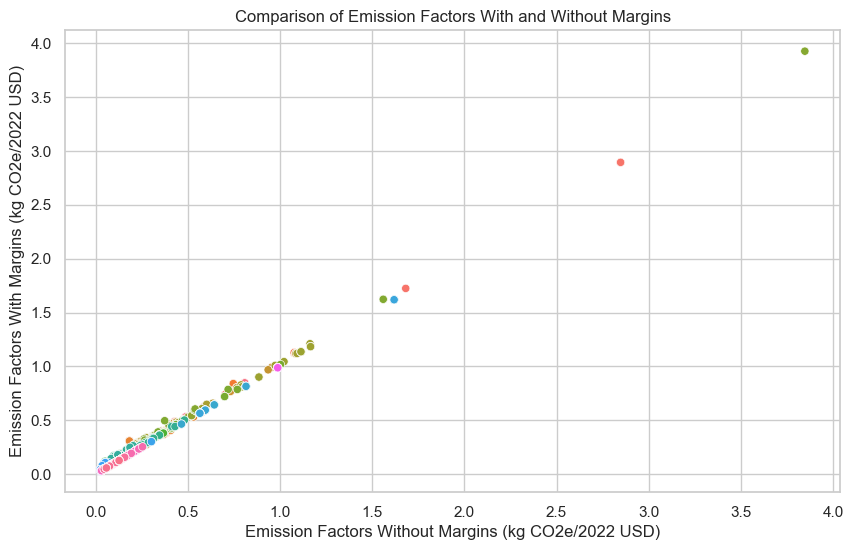

In [18]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Supply Chain Emission Factors without Margins', 
                y='Supply Chain Emission Factors with Margins', hue='2017 NAICS Title', legend=False)
plt.title('Comparison of Emission Factors With and Without Margins')
plt.xlabel('Emission Factors Without Margins (kg CO2e/2022 USD)')
plt.ylabel('Emission Factors With Margins (kg CO2e/2022 USD)')
plt.show()

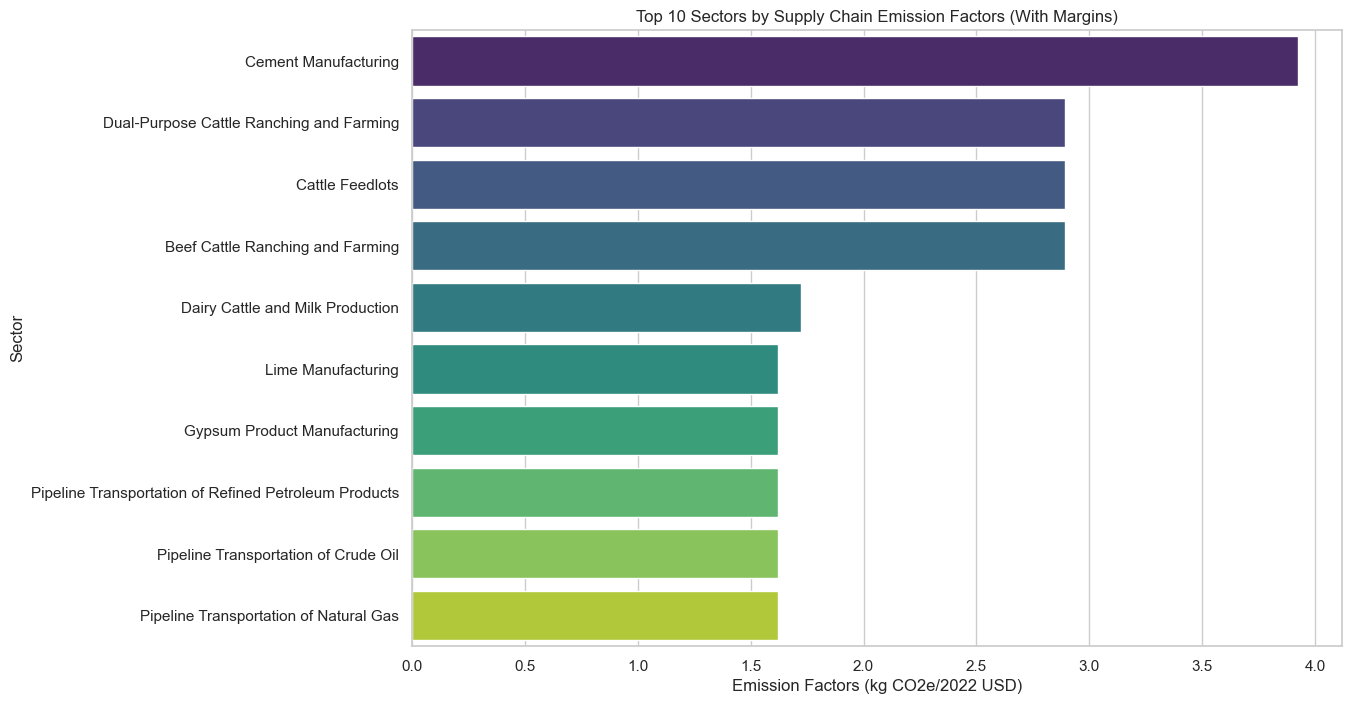

In [19]:
# Sorting data by emission factors with margins
top_sectors = df.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sectors, x='Supply Chain Emission Factors with Margins', y='2017 NAICS Title', palette='viridis')
plt.title('Top 10 Sectors by Supply Chain Emission Factors (With Margins)')
plt.xlabel('Emission Factors (kg CO2e/2022 USD)')
plt.ylabel('Sector')
plt.show()

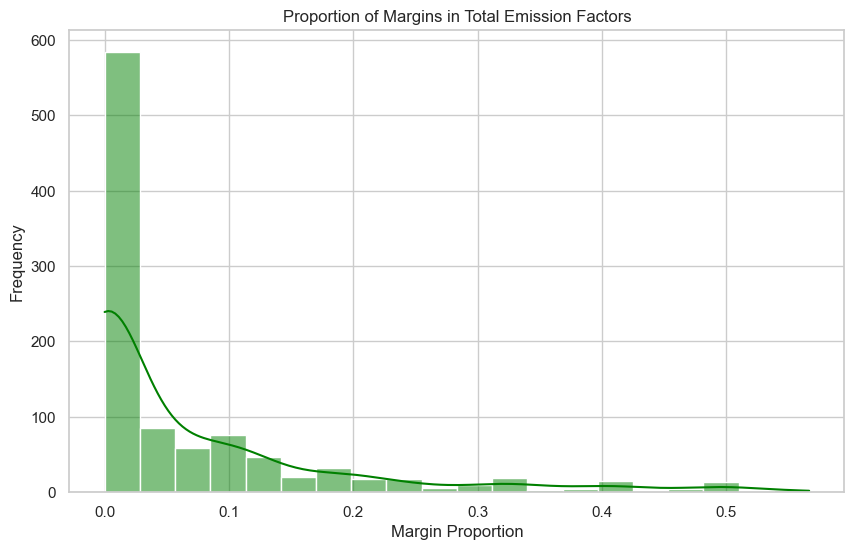

In [20]:
# Calculating the proportion of margins
df['Margin Proportion'] = df['Margins of Supply Chain Emission Factors'] / df['Supply Chain Emission Factors with Margins']

# Plotting the margin proportion
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin Proportion'], kde=True, bins=20, color='green')
plt.title('Proportion of Margins in Total Emission Factors')
plt.xlabel('Margin Proportion')
plt.ylabel('Frequency')
plt.show()


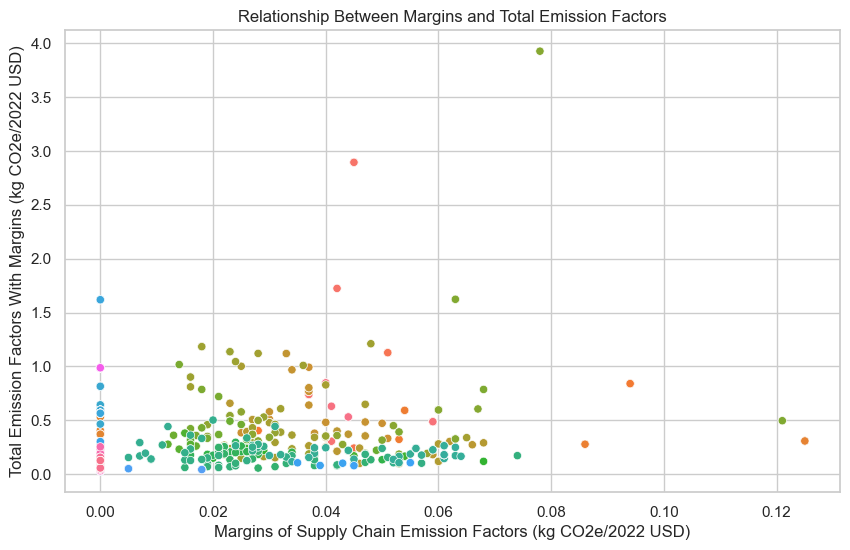

In [21]:
# Scatter plot to explore correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Margins of Supply Chain Emission Factors', 
                y='Supply Chain Emission Factors with Margins', hue='2017 NAICS Title', legend=False)
plt.title('Relationship Between Margins and Total Emission Factors')
plt.xlabel('Margins of Supply Chain Emission Factors (kg CO2e/2022 USD)')
plt.ylabel('Total Emission Factors With Margins (kg CO2e/2022 USD)')
plt.show()


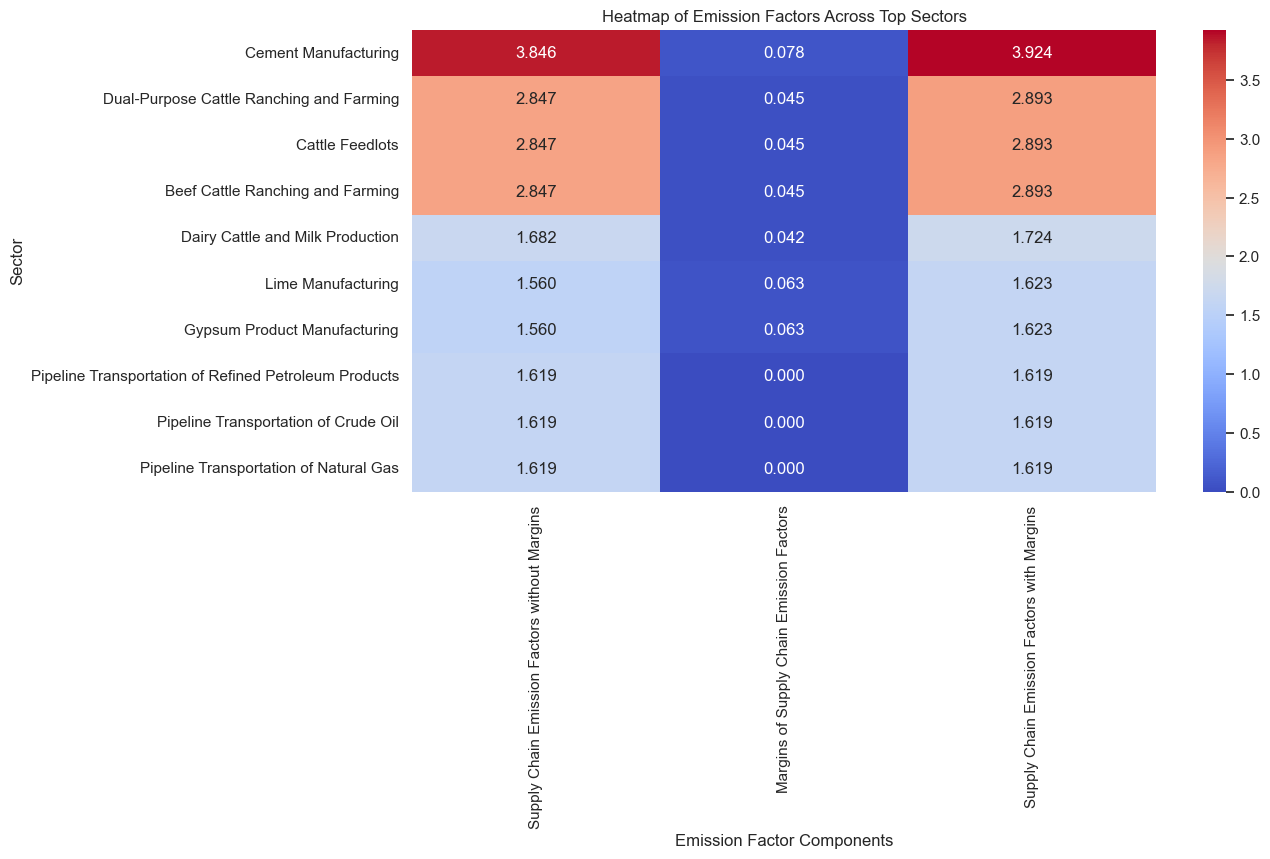

In [22]:
# Preparing data for heatmap
heatmap_data = top_sectors[['2017 NAICS Title', 
                            'Supply Chain Emission Factors without Margins', 
                            'Margins of Supply Chain Emission Factors', 
                            'Supply Chain Emission Factors with Margins']]
heatmap_data = heatmap_data.set_index('2017 NAICS Title')

# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Heatmap of Emission Factors Across Top Sectors')
plt.xlabel('Emission Factor Components')
plt.ylabel('Sector')
plt.show()


# Categorywise-ghg-emission-Insights

In [29]:
# Loading data from the 'naics_ghg_2017' table
query = "SELECT * FROM categorywise_ghg_Emissions_1990_2022"
df = pd.read_sql(query, conn)

# Inspecting the first few rows of the dataset
df.head()

,Table 4-44: Transportation-Related Greenhouse Gas Emissions (million metric tons of CO2 equivalent),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,None,(R) 1990,(R) 1991,(R) 1992,(R) 1993,(R) 1994,(R) 1995,(R) 1996,(R) 1997,(R) 1998,...,(R) 2013,(R) 2014,(R) 2015,(R) 2016,(R) 2017,(R) 2018,(R) 2019,(R) 2020,(R) 2021,2022.0
1,Total transportation emissions,1524.6,1477.9,1536.8,1573.3,1627.8,1662.3,1717.7,1743.7,1785.9,...,1751.1,1785.6,1793.8,1828.8,1846.4,1876.5,1879.5,1629.5,1810.6,1807.8
2,Light-duty vehicles,648.4,623.7,628.5,623.8,619.2,614.1,614.4,608,608.5,...,405.2,415.9,405.4,406.2,392.7,398.7,395.5,341.7,374.2,369.5
3,CO2 (carbon dioxide),622.2,597.4,600.5,593.4,585.2,576.8,573.5,563.4,562.4,...,383.5,396.2,387.6,390.3,379,386.5,384.2,331.9,365,361.0
4,CH4 (methane),3.8,3.5,3.4,3.3,3.2,3.1,2.9,2.8,2.6,...,0.5,0.5,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.2


# Summary_Commodity_2010_2016-Insights

In [34]:
# Loading data from the 'naics_ghg_2017' table
query = "SELECT * FROM Summary_Commodity_2010_2016"
df = pd.read_sql(query, conn)

# Inspecting the first few rows of the dataset
df.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.526,0.061,0.588,None,4,3,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,None,4,3,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,None,4,3,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,None,3,3,1,3,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.256,0.032,0.288,None,4,3,1,4,1


In [35]:
# Analyzing the data to extract insights
# Grouping by 'Commodity Name' and calculating the mean emission factors
mean_emissions = df.groupby('Commodity Name')[['Supply Chain Emission Factors without Margins', 'Supply Chain Emission Factors with Margins']].mean().reset_index()

# Sorting the data to identify the sectors with the highest emissions
mean_emissions_sorted = mean_emissions.sort_values(by='Supply Chain Emission Factors without Margins', ascending=False)

# Displaying the top sectors with the highest emissions
print(mean_emissions_sorted.head())

             Commodity Name  Supply Chain Emission Factors without Margins  \
60                Utilities                                       0.811286   
59     Truck transportation                                       0.357429   
47  Pipeline transportation                                       0.354464   
2        Air transportation                                       0.230429   
63     Water transportation                                       0.181821   

    Supply Chain Emission Factors with Margins  
60                                    0.811286  
59                                    0.357429  
47                                    0.354464  
2                                     0.230429  
63                                    0.181821  


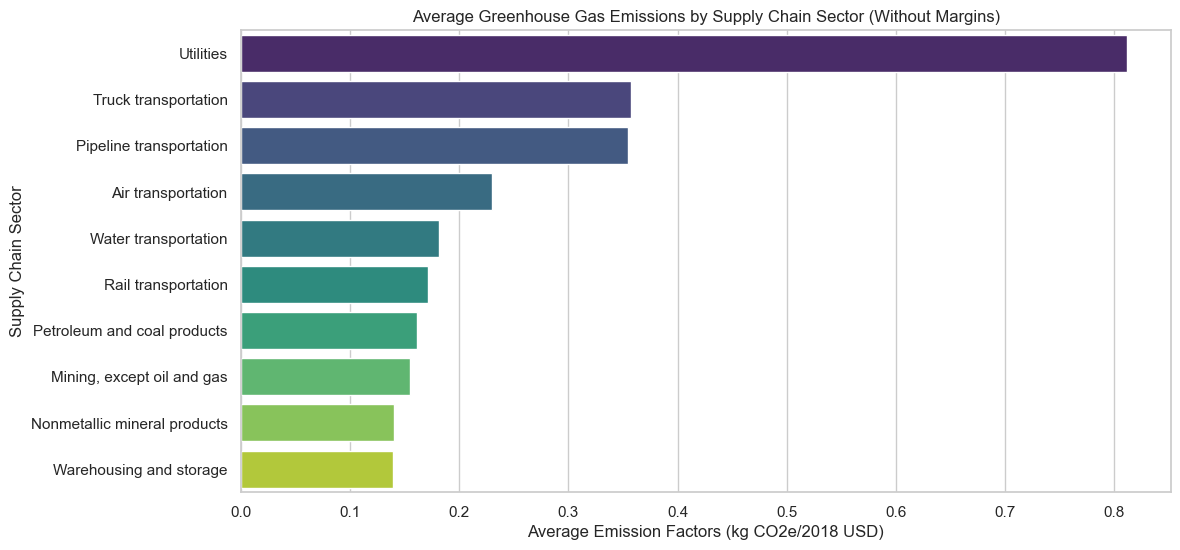

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Create a bar plot for the average emissions by sector
plt.figure(figsize=(12, 6))
sns.barplot(x='Supply Chain Emission Factors without Margins', y='Commodity Name', data=mean_emissions_sorted.head(10), palette='viridis')
plt.title('Average Greenhouse Gas Emissions by Supply Chain Sector (Without Margins)')
plt.xlabel('Average Emission Factors (kg CO2e/2018 USD)')
plt.ylabel('Supply Chain Sector')
plt.show()

# Summary_Industry_2010_2016-Insights

In [39]:
# Loading data from the 'naics_ghg_2017' table
query = "SELECT * FROM Summary_Industry_2010_2016"
df = pd.read_sql(query, conn)

# Inspecting the first few rows of the dataset
df.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.525,0.057,0.582,None,4,3,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,None,4,3,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,None,4,3,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,None,3,3,1,3,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.232,0.024,0.256,None,4,3,1,4,1


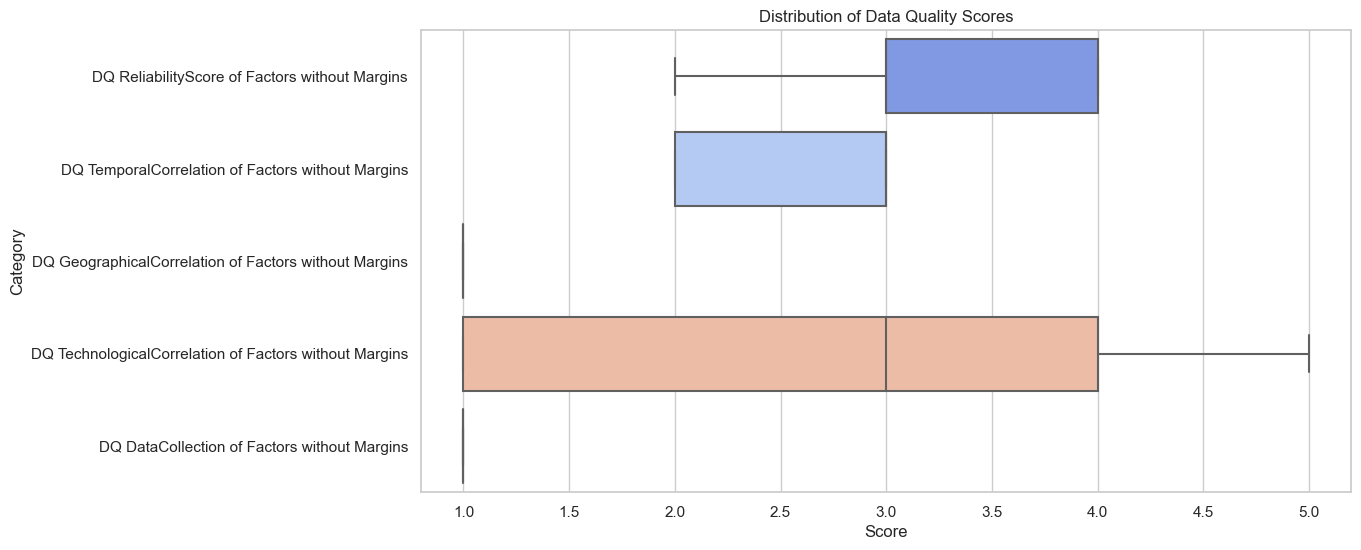

In [45]:
# Creating a boxplot for each Data Quality dimension
plt.figure(figsize=(12, 6))
data_quality_columns = ['DQ ReliabilityScore of Factors without Margins', 
                        'DQ TemporalCorrelation of Factors without Margins', 
                        'DQ GeographicalCorrelation of Factors without Margins', 
                        'DQ TechnologicalCorrelation of Factors without Margins', 
                        'DQ DataCollection of Factors without Margins']

df_melted = df.melt(value_vars=data_quality_columns, var_name='DQ Category', value_name='Score')
sns.boxplot(data=df_melted, x='Score', y='DQ Category', palette='coolwarm')
plt.title('Distribution of Data Quality Scores')
plt.xlabel('Score')
plt.ylabel('Category')
plt.show()


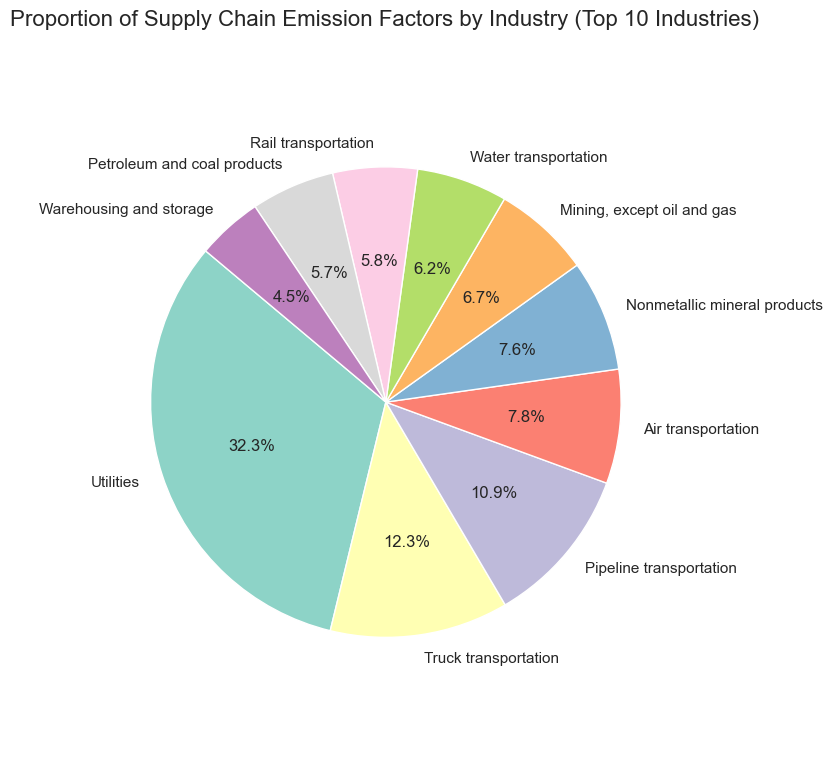

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is the DataFrame loaded from the 'Summary_Industry_2010_2016' table
# Summing the total 'Supply Chain Emission Factors with Margins' for each Industry Name
industry_emissions = df.groupby('Industry Name')['Supply Chain Emission Factors with Margins'].sum().reset_index()

# Sorting industries by total emissions (descending)
industry_emissions_sorted = industry_emissions.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False)

# Selecting the top 10 industries with the highest emissions
top_industries = industry_emissions_sorted.head(10)

# Plotting a Pie Chart for the top 10 industries
plt.figure(figsize=(8, 8))
plt.pie(
    top_industries['Supply Chain Emission Factors with Margins'], 
    labels=top_industries['Industry Name'], 
    autopct='%1.1f%%', 
    colors=sns.color_palette("Set3", len(top_industries)), 
    startangle=140
)

# Adding a title and setting layout
plt.title('Proportion of Supply Chain Emission Factors by Industry (Top 10 Industries)', fontsize=16)
plt.axis('equal')  # Ensures the pie chart is circular
plt.tight_layout()
plt.show()


# Detailed_Industry_2010_2016-Insights

In [50]:
# Loading data from the 'naics_ghg_2017' table
query = "SELECT * FROM Detail_Industry_2010_2016"
df = pd.read_sql(query, conn)

# Inspecting the first few rows of the dataset
df.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,None,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,None,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,None,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,None,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,None,4,3,1,4,1


In [51]:
# Analyzing the data to extract meaningful insights
# First, we will group the data by 'Industry Name' and 'Substance' to calculate the mean emission factors
mean_emissions = df.groupby(['Industry Name', 'Substance'])['Supply Chain Emission Factors without Margins'].mean().reset_index()

# Sorting the data to find the top industries by emissions
top_emissions = mean_emissions.sort_values(by='Supply Chain Emission Factors without Margins', ascending=False).head(10)

# Displaying the top emissions data
print(top_emissions)

                                          Industry Name       Substance  \
204                                Cement manufacturing  carbon dioxide   
384   Electric power generation, transmission, and d...  carbon dioxide   
688               Lime and gypsum product manufacturing  carbon dioxide   
604                        Industrial gas manufacturing  carbon dioxide   
284               Copper, nickel, lead, and zinc mining  carbon dioxide   
1440            Synthetic dye and pigment manufacturing  carbon dioxide   
1496                               Truck transportation  carbon dioxide   
84     Alumina refining and primary aluminum production  carbon dioxide   
1144                            Pipeline transportation  carbon dioxide   
1152          Plastics material and resin manufacturing  carbon dioxide   

      Supply Chain Emission Factors without Margins  
204                                        6.679571  
384                                        4.860714  
688         

In [53]:
# Analyzing emissions by substance across all industries
substance_emissions = df.groupby(['Substance'])['Supply Chain Emission Factors without Margins'].mean().reset_index()

# Sorting the data to find the top substances by emissions
substance_emissions = substance_emissions.sort_values(by='Supply Chain Emission Factors without Margins', ascending=False)

# Displaying the emissions by substance data
print(substance_emissions)

        Substance  Supply Chain Emission Factors without Margins
0  carbon dioxide                                       0.352295
3      other GHGs                                       0.013130
1         methane                                       0.002638
2   nitrous oxide                                       0.000107


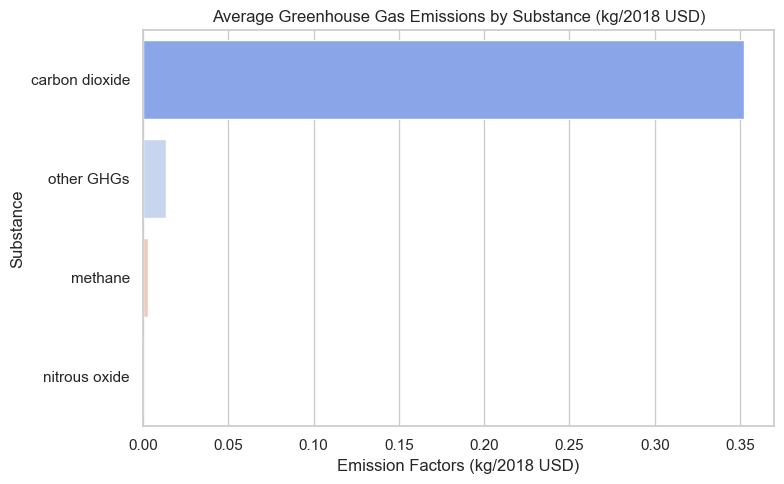

In [54]:
# Creating a bar plot for emissions by substance
plt.figure(figsize=(8, 5))
sns.barplot(data=substance_emissions, x='Supply Chain Emission Factors without Margins', y='Substance', palette='coolwarm')
plt.title('Average Greenhouse Gas Emissions by Substance (kg/2018 USD)')
plt.xlabel('Emission Factors (kg/2018 USD)')
plt.ylabel('Substance')
plt.tight_layout()
plt.savefig('emissions_by_substance.png')
plt.show()

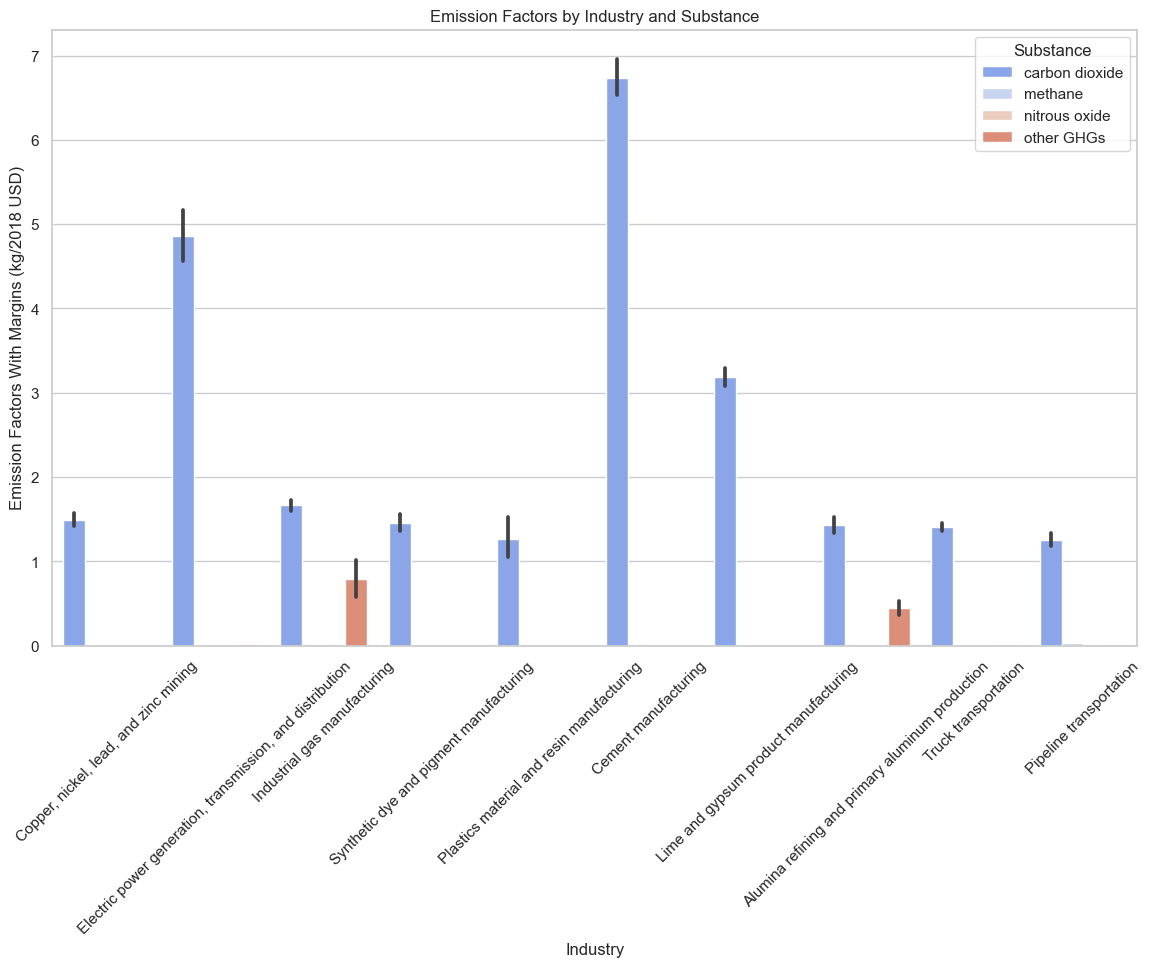

In [59]:
# Filter for top industries
top_industries_list = top_emission_industries.index

filtered_df = df[df['Industry Name'].isin(top_industries_list)]

# Grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_df, x='Industry Name', y='Supply Chain Emission Factors with Margins', hue='Substance', palette='coolwarm')
plt.title('Emission Factors by Industry and Substance')
plt.xlabel('Industry')
plt.ylabel('Emission Factors With Margins (kg/2018 USD)')
plt.xticks(rotation=45)
plt.legend(title='Substance')
plt.show()


# Detailed_Commodity_2010_2016-Insights

In [60]:
# Loading data from the 'naics_ghg_2017' table
query = "SELECT * FROM Detail_Commodity_2010_2016"
df = pd.read_sql(query, conn)

# Inspecting the first few rows of the dataset
df.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,None,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,None,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,None,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,None,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,None,4,3,1,4,1


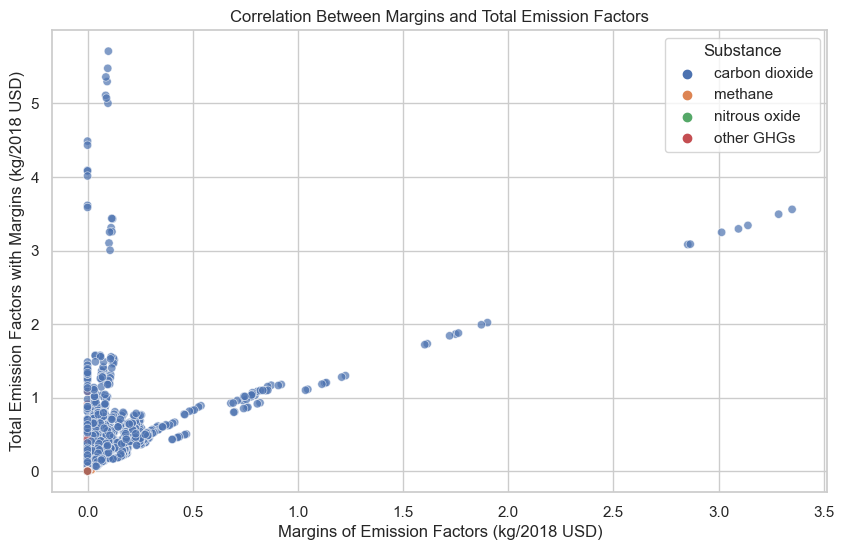

In [64]:
# Scatter plot for correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Margins of Supply Chain Emission Factors', 
                y='Supply Chain Emission Factors with Margins', hue='Substance', alpha=0.7)
plt.title('Correlation Between Margins and Total Emission Factors')
plt.xlabel('Margins of Emission Factors (kg/2018 USD)')
plt.ylabel('Total Emission Factors with Margins (kg/2018 USD)')
plt.legend(title='Substance')
plt.show()


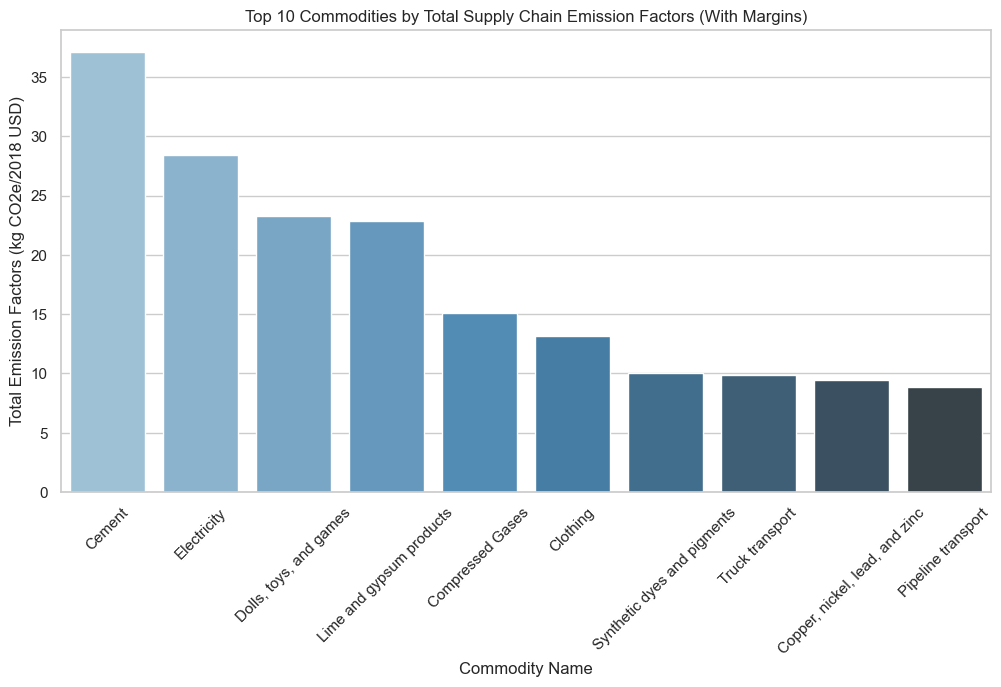

In [73]:
# Aggregating data for the top 10 commodities by total emission factors (with margins)
top_commodities = df.groupby('Commodity Name')['Supply Chain Emission Factors with Margins'].sum().nlargest(10).reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_commodities, x='Commodity Name', y='Supply Chain Emission Factors with Margins', palette='Blues_d')
plt.title('Top 10 Commodities by Total Supply Chain Emission Factors (With Margins)')
plt.xlabel('Commodity Name')
plt.ylabel('Total Emission Factors (kg CO2e/2018 USD)')
plt.xticks(rotation=45)
plt.show()


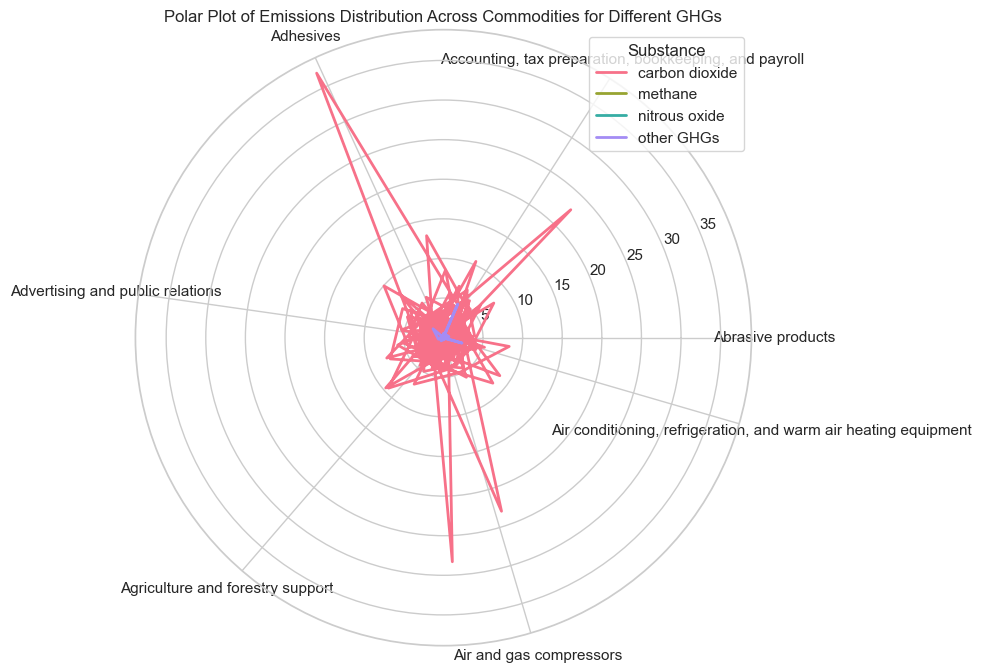

In [87]:
# Aggregate emissions by substance and commodity
polar_data = df.groupby(['Commodity Name', 'Substance'])['Supply Chain Emission Factors with Margins'].sum().reset_index()

# Creating a polar plot for emissions distribution
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))
substances = polar_data['Substance'].unique()
colors = sns.color_palette("husl", len(substances))

# Plotting each substance as a separate series in the polar plot
for idx, substance in enumerate(substances):
    substance_data = polar_data[polar_data['Substance'] == substance]
    ax.plot(substance_data['Commodity Name'], substance_data['Supply Chain Emission Factors with Margins'], label=substance, color=colors[idx], linewidth=2)

ax.set_title('Polar Plot of Emissions Distribution Across Commodities for Different GHGs')
ax.legend(title='Substance')
plt.show()


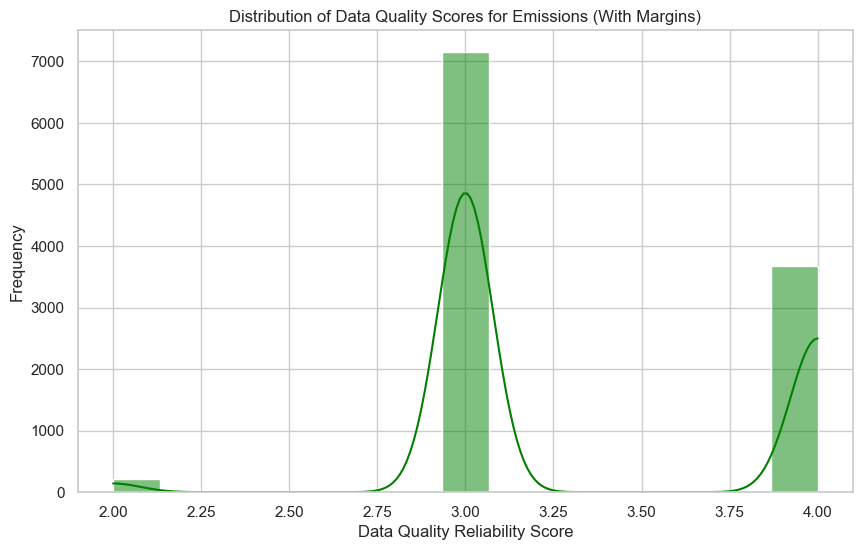

In [88]:
# Plotting the distribution of Data Quality Scores for Emissions (with margins)
plt.figure(figsize=(10, 6))
sns.histplot(df['DQ ReliabilityScore of Factors without Margins'], kde=True, color='green', bins=15)
plt.title('Distribution of Data Quality Scores for Emissions (With Margins)')
plt.xlabel('Data Quality Reliability Score')
plt.ylabel('Frequency')
plt.show()


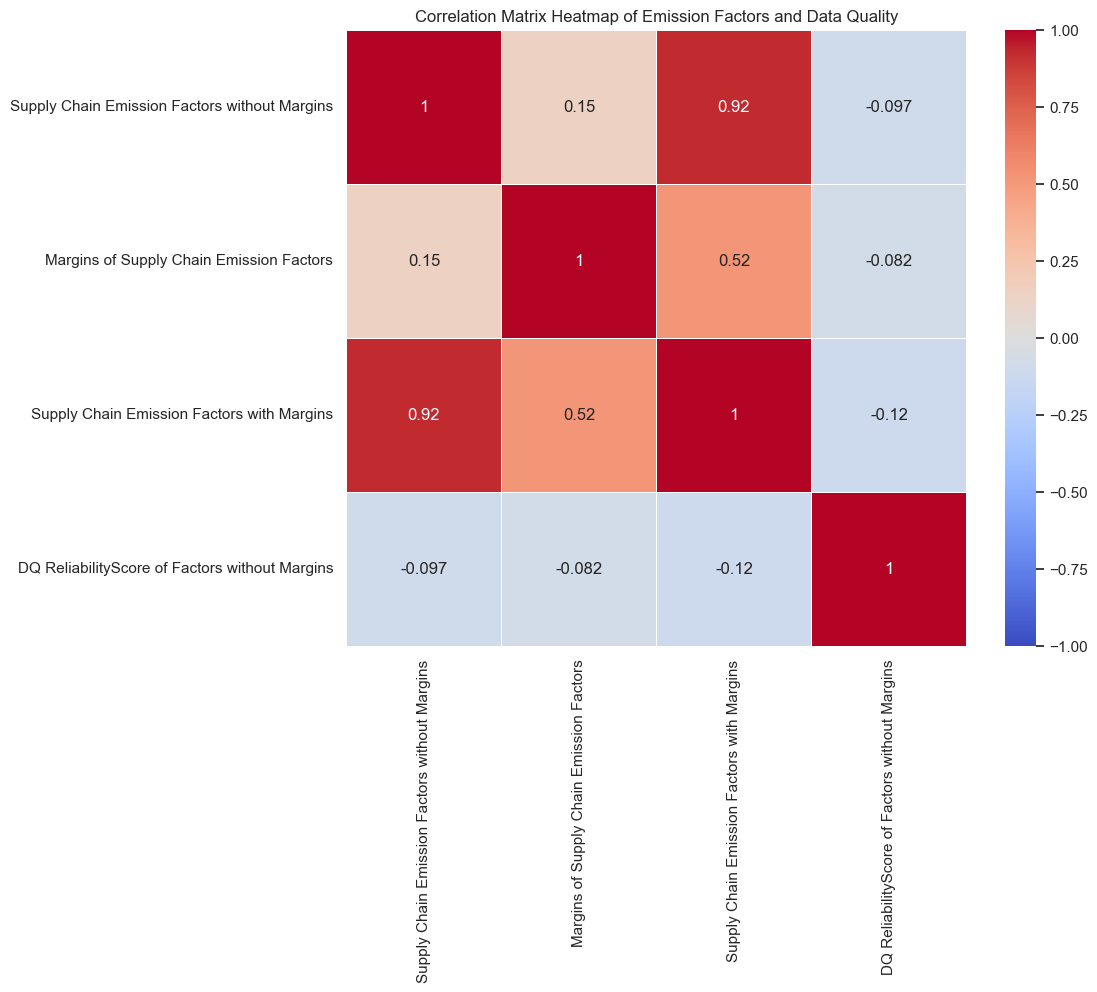

In [89]:
# Select relevant columns for correlation matrix
corr_data = df[['Supply Chain Emission Factors without Margins', 
                'Margins of Supply Chain Emission Factors', 
                'Supply Chain Emission Factors with Margins', 
                'DQ ReliabilityScore of Factors without Margins']]

# Plotting the correlation matrix heatmap
corr_matrix = corr_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Emission Factors and Data Quality')
plt.show()
